In [1]:
import sys
print(sys.path)

['/home/siddharth', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/home/siddharth/.local/lib/python3.9/site-packages', '/usr/lib/python3.9/site-packages', '/usr/lib/python3.9/site-packages/IPython/extensions', '/home/siddharth/.ipython']


In [2]:
from bs4 import BeautifulSoup as soup
from datetime import date, datetime
from urllib.request import Request, urlopen
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport

In [5]:
today = datetime.now()

yesterday = "%s %d %d" %(date.today().strftime("%b"), today.day-1, today.year)

print(yesterday)

May 9 2021


In [6]:
url = "https://www.worldometers.info/coronavirus/#countries"
req = Request(url, headers={'User-Agent' : "Mozilla/5.0"})

webpage = urlopen(req)
page_soup = soup(webpage, "html.parser")



In [7]:
table = page_soup.findAll("table", {"id":"main_table_countries_yesterday"})

containers = table[0].findAll("tr", {"style":""})

title = containers[0]

del containers[0]

all_data = []

clean = True

for country in containers:
    country_data = []
    country_container = country.findAll("td")
    
    if country_container[0].text == "China":
         continue
    for i in range(1, len(country_container)):
        final_feature = country_container[i].text
        if clean : 
            if i != 1 and i != len(country_container)-1:
                final_feature = final_feature.replace(",","")
                
                if final_feature.find("+") != -1:
                    final_feature = final_feature.replace("+", "")
                    final_feature = float(final_feature)
                elif final_feature.find("-") != -1:
                    final_feature = final_feature.replace("-", "")
                    final_feature = float(final_feature)*-1
                    
            if final_feature == 'N/A':
                final_feature = 0
                
            elif final_feature == "" or final_feature == " ":
                  final_feature == -1
            
            country_data.append(final_feature)
            
        all_data.append(country_data)

In [8]:
df = pd.DataFrame(all_data)
df.drop([15,16,17,18,19,20], inplace=True, axis=1)

In [41]:
columns_labels = ["Country","Total Cases","New Cases","Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active", "Serious/Critical", "Total Cases/1M", "Deaths/1M", "Total Tests", "Test/1M", "Population", "Continent"]
df.columns= columns_labels
df.drop_duplicates(subset="Country")

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,Continent
0,World,158959750,649140.0,3306532,10206.0,137380659,746498.0,18272559,107152,20393,424.2,,,,All
21,China,90758,12.0,4636,,85822,12.0,300,1,63,3,160000000,111163,1439323776,Asia
42,USA,33476781,22200.0,595812,241.0,26439712,33841.0,6441257,8977,100634,1791,458168303,1377291,332659090,North America
63,India,22662410,366499.0,246146,3748.0,18665266,353768.0,3750998,8944,16286,177,302275471,217219,1391568121,Asia
84,Brazil,15184790,34162.0,422418,934.0,13714135,36467.0,1048237,8318,71007,1975,46834128,219006,213848364,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,Saint Kitts and Nevis,45,,,,44,,1,,841,,13691,255811,53520,North America
4326,Vatican City,27,,,,15,,12,,33624,,,,803,Europe
4347,Western Sahara,10,,1,,8,,1,,16,2,,,609790,Africa
4368,Samoa,3,,,,2,,1,,15,,,,199539,Australia/Oceania


# EDA

In [31]:
cases = df[["Total Recovered", "Active", "Total Deaths"]].loc[0]

cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ["Type", "Total"]

cases_df["Virus"] = ["COVID-19" for i in range(len(cases_df))]

fig = px.bar(cases_df, x="Virus", y="Total", color ="Type", hover_data=["Total"])

fig.show()

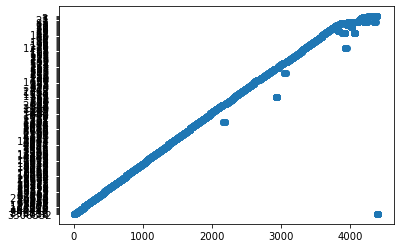

In [32]:
new = df[["Total Deaths", "Total Recovered"]]

new_df = pd.DataFrame(new).reset_index()

new_df.columns = ["C1" , "C2" , "C3"]

plt.scatter(new_df.C1 , new_df.C2)

plt.show()

In [64]:
continent_df = df.groupby("Continent").sum().drop(["Africa" , "Europe" , "North America" , "South America" , "All" , "Australia/Oceania"])
continent_df.sort_values("Total Deaths", inplace=True)
continent_df

,Country,Total Cases,Total Deaths,Total Recovered,Active,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population
Continent,,,,,,,,,,,
Asia,ChinaChinaChinaChinaChinaChinaChinaChinaChinaC...,9075890758907589075890758907589075890758907589...,4636 4636 4636 4636 4636 4636 4636 4636 4636 4...,8582285822858228582285822858228582285822858228...,3003003003003003003003003003003003003003003003...,1111111111111111111118944894489448944894489448...,6363636363636363636363636363636363636363631628...,3333333333333333333331771771771771771771771771...,1600000001600000001600000001600000001600000001...,1111631111631111631111631111631111631111631111...,1439323776 1439323776 1439323776 1439323776 14...
